# CSCI 250: Project 6 - Lucy Buhayenko

## Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from scipy.stats import mode
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


## Student Lifestyle Dataset

In [124]:
df = pd.read_csv('student_lifestyle_dataset.csv')
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


## There are 8 columns

In [125]:
df.columns

Index(['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day',
       'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day',
       'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Level'],
      dtype='object')

## Missing values: There are no missing values, so no need to delete / replace anything

In [126]:
df.isnull().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level                       0
dtype: int64

## Defining features and target

In [127]:
X = df.drop(columns=["Student_ID", "Stress_Level"])
y = df["Stress_Level"]

## Splitting Data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Part 1

## Compare Decision Tree and Random Forest with different deph with KFold

### I chose max depth = 3 for decision tree becuase when the mean cv accuracy is at max(when it's at 1.00), then max depth = 3. Also, for Random forest the max depth is 5 because we can see that when the mean cv accuracy is at maximum(1.00), then max depth is 5

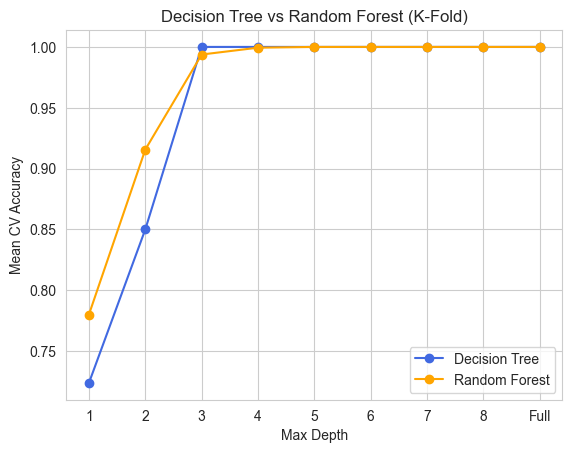

Decision Tree scores = [np.float64(0.72375), np.float64(0.85), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]
Random Forest scores = [np.float64(0.78), np.float64(0.915625), np.float64(0.99375), np.float64(0.999375), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


In [129]:
kf = KFold(n_splits=5, random_state=42, shuffle=True)

score_dt = []
score_rf = []
depths = [1, 2, 3, 4, 5, 6, 7, 8, None]

for d in depths:
    dt_scores = []
    rf_scores = []
    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        dt = DecisionTreeClassifier(criterion="gini", max_depth=d, random_state=42)
        rf = RandomForestClassifier(criterion="gini", max_depth=d, n_estimators=100, random_state=42)

        dt.fit(X_tr, y_tr)
        rf.fit(X_tr, y_tr)

        dt_scores.append(dt.score(X_val, y_val))
        rf_scores.append(rf.score(X_val, y_val))

    score_dt.append(np.mean(dt_scores))
    score_rf.append(np.mean(rf_scores))

#results
depth_labels = [str(x) if x is not None else "Full" for x in depths]
plt.plot(depth_labels, score_dt, marker='o', color='royalblue', label='Decision Tree')
plt.plot(depth_labels, score_rf, marker='o', color='orange', label='Random Forest')
plt.xlabel("Max Depth")
plt.ylabel("Mean CV Accuracy")
plt.title("Decision Tree vs Random Forest (K-Fold)")
plt.legend()
plt.grid(True)
plt.show()

print("Decision Tree scores =", score_dt)
print("Random Forest scores =", score_rf)


## Pick the best one
### The best model is Decision Tree with depth 3 becauase it requires less compute, and although random forest eventually catch up to it at depth of 5, that model would require more compute and would add inefficiencies.

## Compute the accuracy and  F1 of the testing set
### Test Accuracy: 0.988
### Test F1-score: 0.987

In [130]:
best_depth = 3
best_model_type = "DecisionTree"

if best_model_type == "DecisionTree":
    best_model = RandomForestClassifier(max_depth=best_depth, n_estimators=100, random_state=42)
else:
    best_model = DecisionTreeClassifier(max_depth=best_depth, random_state=42)

best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")
print(classification_report(y_test, y_pred))

print(f"Test Accuracy: {acc:.3f}")
print(f"Test F1-score: {f1:.3f}")

              precision    recall  f1-score   support

        High       1.00      1.00      1.00       206
         Low       1.00      0.93      0.96        67
    Moderate       0.96      1.00      0.98       127

    accuracy                           0.99       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.99      0.99       400

Test Accuracy: 0.988
Test F1-score: 0.987


## Plotting Confusion Matrix

### The confusion matrix shows that the model where Decision Tree has depth = 3 has correctly predicted almost all values. It has correctly predicted 206 high values, 62 low values, and 127 moderate values. There are 5 Low values that were predicted incorrectly. All 5 of those misclassifications were predicted to be Moderate when they were supposed to be Low. It would be way worse if it classified as high. Therefore, the model is not bad. 

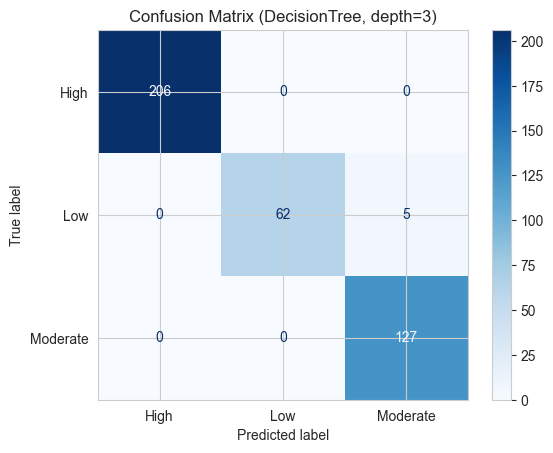

In [131]:
disp = ConfusionMatrixDisplay.from_estimator(
    best_model, X_test, y_test, cmap=plt.cm.Blues
)
disp.ax_.set_title(f"Confusion Matrix ({best_model_type}, depth={best_depth})")
plt.show()

## See what are the most important features, plot an histogram of the features of importance

### The importance numbers show how important each factor is for predicting the outcome. The higher the more important. Study_Hours_Per_Day is the most important(0.600813) - the model thinks how much you study matters the most, while Extracurricular_Hours_Per_Day(0.001679), is the least important - this means that Extracurricular_Hours_Per_Day practically doesn't matter for the model. Since the model is 5 levels deep, the model focuses on the strongest factors first, thus, Study_Hours_Per_Day and Sleep_Hours_Per_Day are most important - meaning that it's the most important that study hours and sleep hours matter the most. 

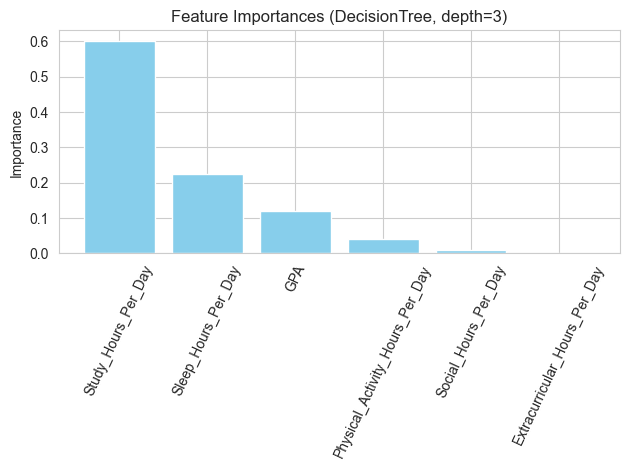

Feature Importances:
Study_Hours_Per_Day                0.600813
Sleep_Hours_Per_Day                0.225869
GPA                                0.120892
Physical_Activity_Hours_Per_Day    0.040870
Social_Hours_Per_Day               0.009878
Extracurricular_Hours_Per_Day      0.001679
dtype: float64


In [132]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure()
plt.bar(importances.index, importances.values, color='skyblue')
plt.xticks(rotation=65)
plt.title(f"Feature Importances ({best_model_type}, depth={best_depth})")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

print("Feature Importances:")
print(importances)


# Part 2

## Train a Decision Tree with depth=3

In [133]:
dt3 = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
dt3.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


##  Plot the Decision Tree (depth=3)

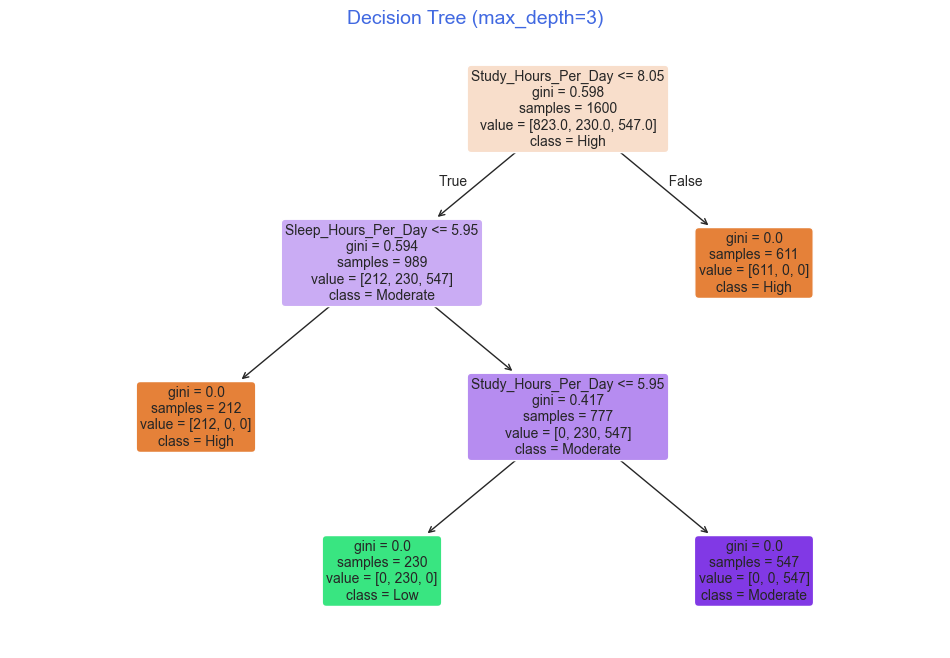

In [134]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 8))
plot_tree(
    dt3,
    feature_names=X.columns,
    class_names=dt3.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree (max_depth=3)", fontsize=14, color='royalblue')
plt.show()


## Predict the class of the first row in test set

In [135]:
first_row = X_test.iloc[0]
print("First test sample features:\n")
print(first_row)


First test sample features:

Study_Hours_Per_Day                6.20
Extracurricular_Hours_Per_Day      4.00
Sleep_Hours_Per_Day                6.00
Social_Hours_Per_Day               3.50
Physical_Activity_Hours_Per_Day    4.30
GPA                                2.88
Name: 1860, dtype: float64


### I want to predict the class for Study_Hours_Per_Day. The first test sample is Study_Hours_Per_Day = 6.20. 
### 6.20 <= 8.05 True
### 6.20 <= 5.95 False
### 6.20 <= 5.95 False
### Therefore, the class would be Moderate

# Part 3

## Create 3 Decision Trees with different feature sets

In [136]:
# Pick 3 features for each tree
features_1 = ["Study_Hours_Per_Day", "Sleep_Hours_Per_Day", "GPA"]
features_2 = ["Extracurricular_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]
features_3 = ["Study_Hours_Per_Day", "Social_Hours_Per_Day", "Physical_Activity_Hours_Per_Day"]

trees = []
feature_sets = [features_1, features_2, features_3]

for i, feats in enumerate(feature_sets, start=1):
    model = DecisionTreeClassifier(max_depth=4, random_state=42)
    model.fit(X_train[feats], y_train)
    trees.append(model)
    print(f"Tree {i} trained on features: {feats}")


Tree 1 trained on features: ['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'GPA']
Tree 2 trained on features: ['Extracurricular_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']
Tree 3 trained on features: ['Study_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day']


##  Predictions from each Decision Tree

### The feature set is more important because the strong features consistently help the trees make better predictions while weak features don't. For example, Study_Hours_Per_Day and Sleep_Hours_Per_Day features are most important and the accuracy's higher(Tree 1 Accuracy: 1.000, F1: 1.000). While, features like Extracurricular_Hours_Per_Day and Social_Hours_Per_Day are least important, so the accuracy is much lower (Tree 2 Accuracy: 0.510, F1: 0.448). Therefore, features that actually improve the prediction accuracy across many trees are considered more important and the weaker ones barely help so the importance is low. 

In [137]:
predictions = []
for i, (tree, feats) in enumerate(zip(trees, feature_sets), start=1):
    y_pred_tree = tree.predict(X_test[feats])
    predictions.append(y_pred_tree)
    acc = accuracy_score(y_test, y_pred_tree)
    f1 = f1_score(y_test, y_pred_tree, average='weighted')
    print(f"Tree {i} Accuracy: {acc:.3f}, F1: {f1:.3f}")

Tree 1 Accuracy: 1.000, F1: 1.000
Tree 2 Accuracy: 0.510, F1: 0.448
Tree 3 Accuracy: 0.877, F1: 0.877


## Create an Ensemble (Majority Vote) using mode

### Ensemble Results:
### Accuracy: 0.988
### F1-score: 0.987

In [138]:
#convert predictions into DataFrame
pred_df = pd.DataFrame(np.array(predictions).T, columns=["Tree1", "Tree2", "Tree3"])

#row-wise mode (majority vote)
ensemble_preds = pred_df.mode(axis=1)[0]

# Evaluate ensemble
ensemble_acc = accuracy_score(y_test, ensemble_preds)
ensemble_f1 = f1_score(y_test, ensemble_preds, average='weighted')

print("\nEnsemble Results:")
print(f"Accuracy: {ensemble_acc:.3f}")
print(f"F1-score: {ensemble_f1:.3f}")


Ensemble Results:
Accuracy: 0.988
F1-score: 0.987


## Compare Ensemble vs Individual Trees

### Tree 1 has highest individual accuracy because it fits the data very well, but it may overfit and fail on new data. The ensamble considers all trees, so it uses tree 1 heavily but also includes trees 2 and 3 to balance errors. This makes ensemble more robust and reliable, reducing the risk of mistakes from any single tree

In [139]:
results = {
    "Tree 1": [accuracy_score(y_test, predictions[0]), f1_score(y_test, predictions[0], average='weighted')],
    "Tree 2": [accuracy_score(y_test, predictions[1]), f1_score(y_test, predictions[1], average='weighted')],
    "Tree 3": [accuracy_score(y_test, predictions[2]), f1_score(y_test, predictions[2], average='weighted')],
    "Ensemble": [ensemble_acc, ensemble_f1]
}

comparison = pd.DataFrame(results, index=["Accuracy", "F1-score"]).T
print("\nPerformance Comparison:")
print(comparison)



Performance Comparison:
          Accuracy  F1-score
Tree 1      1.0000  1.000000
Tree 2      0.5100  0.448451
Tree 3      0.8775  0.877366
Ensemble    0.9875  0.987496


# Part 4

## Pick the same 3 decision trees from part 3 and use logistic regression

In [140]:
train_preds = []
test_preds = []

for i, (tree, feats) in enumerate(zip(trees, feature_sets), start=1):
    y_train_pred = tree.predict(X_train[feats])
    y_test_pred = tree.predict(X_test[feats])
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)

#convert into DataFrames
meta_train = pd.DataFrame(np.array(train_preds).T, columns=["Tree1", "Tree2", "Tree3"])
meta_test  = pd.DataFrame(np.array(test_preds).T,  columns=["Tree1", "Tree2", "Tree3"])


In [141]:
#encode string labels for logistic regression
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

# Also encode the categorical tree outputs into numeric values
meta_train_enc = meta_train.apply(le.transform)
meta_test_enc  = meta_test.apply(le.transform)

In [142]:
#Train Logistic Regression as meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(meta_train_enc, y_train_enc)

# Predict on test meta-features
meta_preds_enc = meta_model.predict(meta_test_enc)
meta_preds = le.inverse_transform(meta_preds_enc)

In [143]:
#evaluate Logistic Regression Ensemble
meta_acc = accuracy_score(y_test, meta_preds)
meta_f1 = f1_score(y_test, meta_preds, average='weighted')

print("Logistic Regression Ensemble Results:")
print(f"Accuracy: {meta_acc:.3f}")
print(f"F1-score: {meta_f1:.3f}")


Logistic Regression Ensemble Results:
Accuracy: 1.000
F1-score: 1.000


In [144]:
#compare with Previous Models (Part 3)
comparison = pd.DataFrame({
    "Tree 1": [accuracy_score(y_test, predictions[0]), f1_score(y_test, predictions[0], average='weighted')],
    "Tree 2": [accuracy_score(y_test, predictions[1]), f1_score(y_test, predictions[1], average='weighted')],
    "Tree 3": [accuracy_score(y_test, predictions[2]), f1_score(y_test, predictions[2], average='weighted')],
    "Majority Vote Ensemble": [ensemble_acc, ensemble_f1],
    "Logistic Regression Ensemble": [meta_acc, meta_f1]
}, index=["Accuracy", "F1-score"]).T

print("\nModel Performance Comparison:")
print(comparison)



Model Performance Comparison:
                              Accuracy  F1-score
Tree 1                          1.0000  1.000000
Tree 2                          0.5100  0.448451
Tree 3                          0.8775  0.877366
Majority Vote Ensemble          0.9875  0.987496
Logistic Regression Ensemble    1.0000  1.000000


## Majority Vote Ensamble vs Logistic Regression Ensemble:
### The table shows that the ensamble vote and logistic regression models both showed great results: Vote Ensemble has accuracy: 0.9875 and F1: 0.987496. While Logistic regression's accuracy: 1.0000 and F1: 1.000000. The results are almost the same. However, in this case it's better to use Logistic Regression Ensamble for it's simplicity and speed, since it will be much more interpretable. A logistic regression model is easier to understand and implement, trains faster, and allows for easier understanding of feature impact.